Projeto de SQL

Análise Exploratória de Dados: Cartões de Crédito

Resumo

Introdução

Análise de dados

Conclusão

Objetivo


Os cartões de crédito tornaram-se parte integrante do sistema financeiro moderno, não concorda? Neste projeto de análise exploratória de dados (EDA), analisaremos cuidadosamente os dados dos clientes de cartão de crédito. Nosso objetivo é entender melhor esses clientes, extraindo tendências e padrões dos dados, o que nos permitirá extrair insights valiosos que nos ajudarão a crescer e otimizar nosso negócio. Ao tomar decisões informadas, podemos aumentar a fidelidade do cliente, aumentar a receita e melhorar o desempenho geral.

1.2 Descrição dos dados

A fonte de dados da nossa análise é um arquivo de valores separados por vírgula (CSV) com dados fictícios para simular informações de contas bancárias criado por André Perez. Você pode acessar esse arquivo (credito.csv) neste link.

1.3 Colunas/variáveis ​​de dados

O conjunto de dados consiste nas colunas/variáveis ​​da seguinte forma:

idade = idade do cliente
sexo = gênero do cliente (F ou M)
dependentes = número de dependentes do cliente
escolaridade = nível de escolaridade do cliente
status_marital = estado civil do cliente
salário_anual = faixa salarial anual do cliente
card_type = tipo de cartão do cliente
qty_products = número de produtos adquiridos nos últimos 12 meses
iteration_12m = número de interações/transações nos últimos 12 meses
inactive_months_12m = número de meses que o cliente ficou inativo
credit_limit = limite de crédito do cliente
transaction_value_12m = valor das transações dos últimos 12 meses
qty_transactions_12m = número de transações nos últimos 12 meses



1.4 Ferramentas

Para este trabalho de análise utilizaremos apenas dois Amazon Web Services (AWS), o S3 e o Athena, o primeiro é um serviço de armazenamento e o último é um serviço de consulta que utiliza Structured Query Language (SQL) para tratar os dados.

2. Análise de dados

2.1 Visão geral

Primeiro, vamos dar uma olhada em nossos dados para entender melhor o que temos em mãos.

Como são nossos dados? (esquema)

In [ ]:
!wget -O 'imagem.png' 'https://camo.githubusercontent.com/904db3a3545116ce0e236c8acc28f70b149f71763c33fcb309421a57e31a9495/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f30312e706e673f7261773d74727565'

--2024-04-03 22:26:11--  https://camo.githubusercontent.com/904db3a3545116ce0e236c8acc28f70b149f71763c33fcb309421a57e31a9495/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f30312e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1530 (1.5K) [image/png]
Saving to: ‘imagem.png’

imagem.png          100%[===================>]   1.49K  --.-KB/s    in 0s      

2024-04-03 22:26:12 (12.6 MB/s) - ‘imagem.png’ saved [1530/1530]



In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#A função cv2.imshow é incompatível com Jupyter
#https://github.com/jupyter/notebook/issues/3935

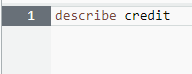

In [ ]:
imagem = cv2.imread('imagem.png')
cv2_imshow(imagem)

In [ ]:
!wget -O 'imagem.png1' 'https://camo.githubusercontent.com/548f19f7bcd995b6456aa76f0f13a275f83b0502094560bac1c9c1f312eb5958/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f30322e706e673f7261773d74727565'

--2024-04-03 22:50:31--  https://camo.githubusercontent.com/548f19f7bcd995b6456aa76f0f13a275f83b0502094560bac1c9c1f312eb5958/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f30322e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23355 (23K) [image/png]
Saving to: ‘imagem.png1’

imagem.png1         100%[===================>]  22.81K  --.-KB/s    in 0.002s  

2024-04-03 22:50:32 (14.8 MB/s) - ‘imagem.png1’ saved [23355/23355]



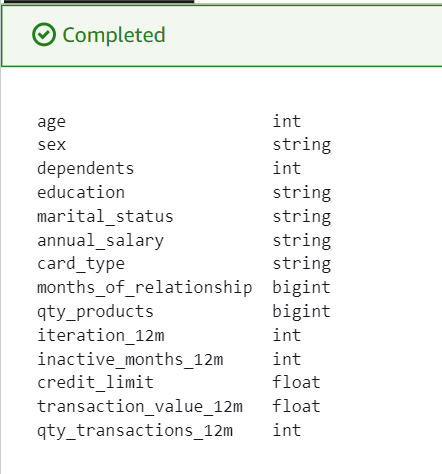

In [ ]:
imagem = cv2.imread('imagem.png1')
cv2_imshow(imagem)

Aqui temos 13 colunas, sendo 5 categóricas e 8 numéricas.

Quantas linhas?

In [ ]:
!wget -O 'imagem.png2' 'https://camo.githubusercontent.com/8f6a36b5ae07143fd2b6a9d385a6a07c479c602bb7b1902dcc61b0460d61c393/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f30332e706e673f7261773d74727565'

--2024-04-03 22:56:38--  https://camo.githubusercontent.com/8f6a36b5ae07143fd2b6a9d385a6a07c479c602bb7b1902dcc61b0460d61c393/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f30332e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2638 (2.6K) [image/png]
Saving to: ‘imagem.png2’

imagem.png2         100%[===================>]   2.58K  --.-KB/s    in 0s      

2024-04-03 22:56:38 (6.02 MB/s) - ‘imagem.png2’ saved [2638/2638]



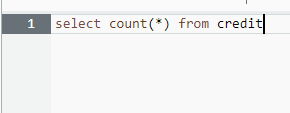

In [ ]:
imagem = cv2.imread('imagem.png2')
cv2_imshow(imagem)

In [ ]:
!wget -O 'imagem.png3' 'https://camo.githubusercontent.com/66c8108d0b38685185ec3fa85d6598612d3abe4a9f1c14de4155938846a2806f/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f30342e706e673f7261773d74727565'

--2024-04-03 22:58:36--  https://camo.githubusercontent.com/66c8108d0b38685185ec3fa85d6598612d3abe4a9f1c14de4155938846a2806f/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f30342e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3314 (3.2K) [image/png]
Saving to: ‘imagem.png3’

imagem.png3         100%[===================>]   3.24K  --.-KB/s    in 0s      

2024-04-03 22:58:37 (36.0 MB/s) - ‘imagem.png3’ saved [3314/3314]



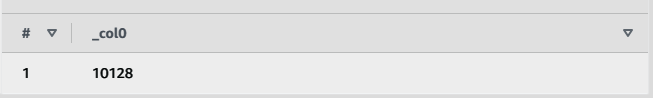

In [ ]:
imagem = cv2.imread('imagem.png3')
cv2_imshow(imagem)

Neste conjunto de dados, temos 10.128 linhas.

Quais são provavelmente os dados mais importantes?

Devemos dar atenção especial aos dados numéricos sobre tempo de relacionamento, limite de crédito e dados categóricos como tipo de cartão e salário anual em busca de um relacionamento e, eventualmente, um insight.

Nosso conjunto de dados está limpo (sem espaços em branco)?

In [ ]:
!wget -O 'imagem.png4' 'https://camo.githubusercontent.com/aefd2d887f28fdb1d255b91ab49ff44dda0863ef3104d82a2941e5a9dd9a6970/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f30352e706e673f7261773d74727565'

--2024-04-03 23:01:51--  https://camo.githubusercontent.com/aefd2d887f28fdb1d255b91ab49ff44dda0863ef3104d82a2941e5a9dd9a6970/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f30352e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22428 (22K) [image/png]
Saving to: ‘imagem.png4’

imagem.png4         100%[===================>]  21.90K  --.-KB/s    in 0.002s  

2024-04-03 23:01:51 (13.4 MB/s) - ‘imagem.png4’ saved [22428/22428]



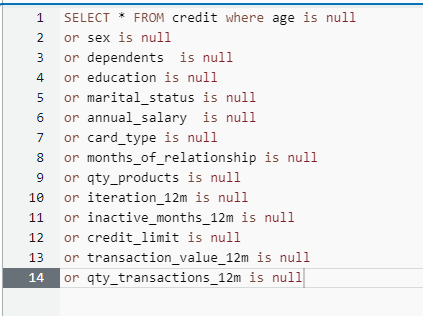

In [ ]:
imagem = cv2.imread('imagem.png4')
cv2_imshow(imagem)

In [ ]:
!wget -O 'imagem.png5' 'https://camo.githubusercontent.com/1b41934082c95229d83af24d83801bd463c59b49e75891935f9bb021efdad722/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f30362e706e673f7261773d74727565'

--2024-04-03 23:03:56--  https://camo.githubusercontent.com/1b41934082c95229d83af24d83801bd463c59b49e75891935f9bb021efdad722/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f30362e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61823 (60K) [image/png]
Saving to: ‘imagem.png5’

imagem.png5         100%[===================>]  60.37K  --.-KB/s    in 0.01s   

2024-04-03 23:03:56 (5.23 MB/s) - ‘imagem.png5’ saved [61823/61823]



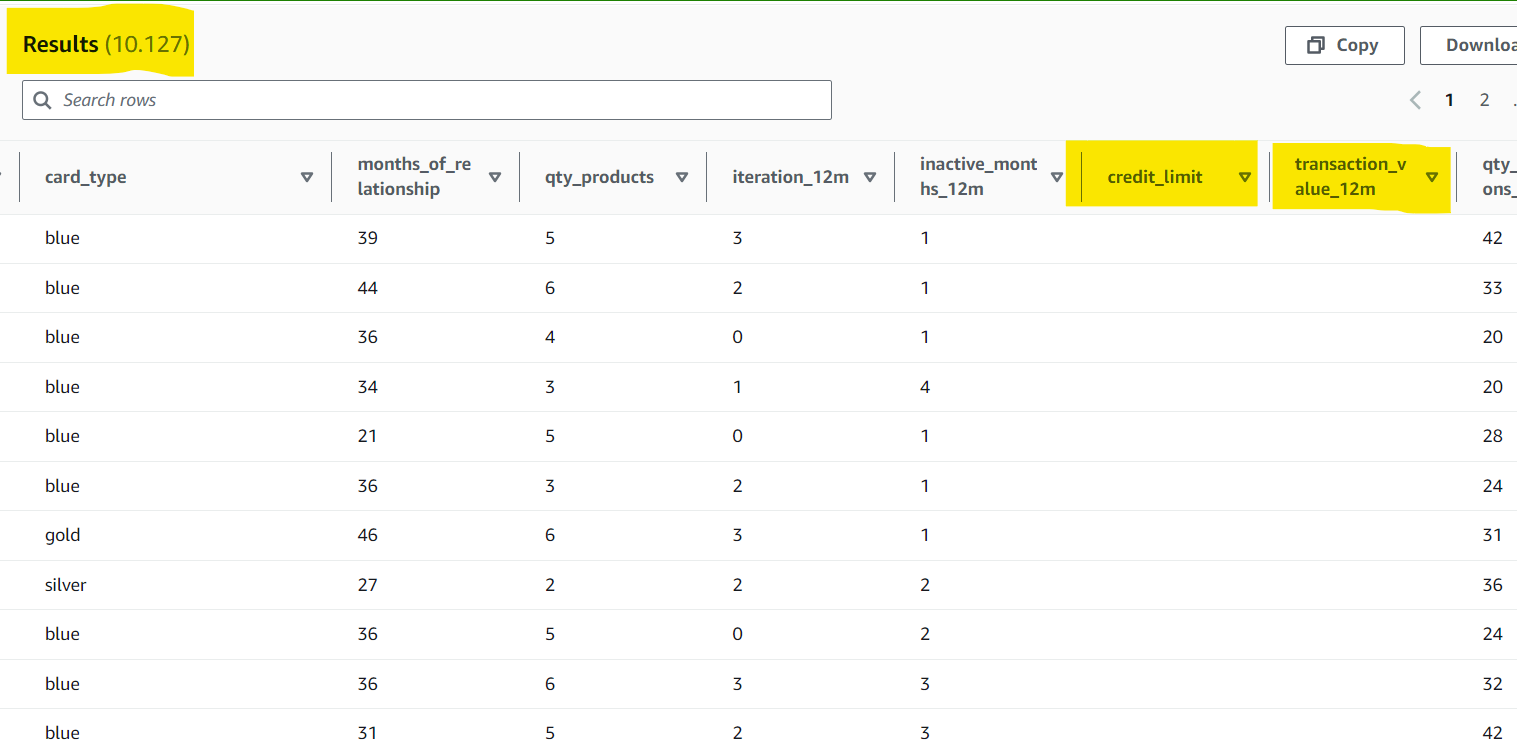

In [ ]:
imagem = cv2.imread('imagem.png5')
cv2_imshow(imagem)

Como é possível perceber que temos um problema aqui? A consulta retorna 10.127 linhas com valores nulos, quase todo o conjunto de dados. Como você pode ver na imagem acima, esses valores estão em duas colunas: credit_limit e transaction_value_12m.

Solução:

Para resolver esse problema, fiz algumas alterações nas propriedades da nossa tabela e na nossa fonte de dados. Primeiro, mudei o delimitador de campo de "," para ";" e o delimitador decimal de "," a ".", eliminando a necessidade de aspas "" e estabelecendo o uso do padrão Athena.

In [ ]:
!wget -O 'imagem.png6' 'https://camo.githubusercontent.com/49fa9809a208b4e64f800199530509b2359bd956e44e5e8c9e44874af05b0ff2/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f30372e706e673f7261773d74727565'

--2024-04-03 23:10:14--  https://camo.githubusercontent.com/49fa9809a208b4e64f800199530509b2359bd956e44e5e8c9e44874af05b0ff2/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f30372e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 629868 (615K) [image/png]
Saving to: ‘imagem.png6’

imagem.png6         100%[===================>] 615.11K  --.-KB/s    in 0.04s   

2024-04-03 23:10:15 (13.4 MB/s) - ‘imagem.png6’ saved [629868/629868]



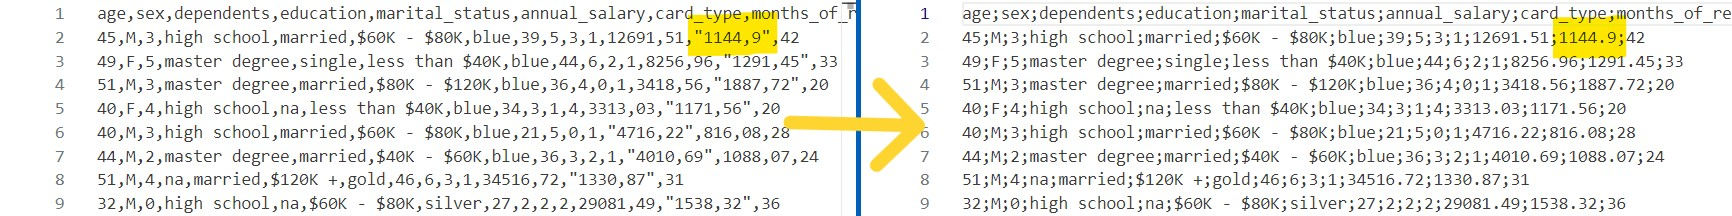

In [ ]:
imagem = cv2.imread('imagem.png6')
cv2_imshow(imagem)

Posteriormente, atualizei as propriedades da tabela para refletir essas alterações na fonte de dados. Essas alterações são feitas no console do AWS Glue.

In [ ]:
!wget -O 'imagem.png7' 'https://camo.githubusercontent.com/37f075e2ac7852fa4b4bcccbfbef825ea5f98c0f6bdb9045f4af7442f962f9bd/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f30382e706e673f7261773d74727565'

--2024-04-03 23:12:49--  https://camo.githubusercontent.com/37f075e2ac7852fa4b4bcccbfbef825ea5f98c0f6bdb9045f4af7442f962f9bd/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f30382e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23031 (22K) [image/png]
Saving to: ‘imagem.png7’

imagem.png7         100%[===================>]  22.49K  --.-KB/s    in 0.001s  

2024-04-03 23:12:49 (15.7 MB/s) - ‘imagem.png7’ saved [23031/23031]



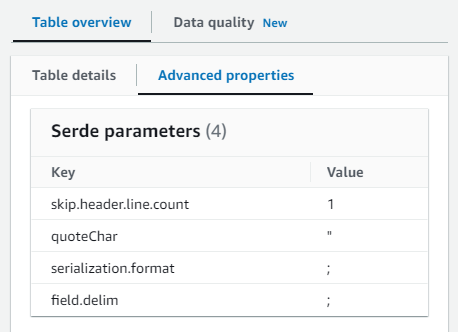

In [ ]:
imagem = cv2.imread('imagem.png7')
cv2_imshow(imagem)

Executando a mesma consulta anterior:

In [ ]:
!wget -O 'imagem.png8' 'https://camo.githubusercontent.com/b96c077616b5810c181c13f758ca0d664f2837649725909b830e820a0d05bc20/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f30392e706e673f7261773d74727565'

--2024-04-03 23:15:16--  https://camo.githubusercontent.com/b96c077616b5810c181c13f758ca0d664f2837649725909b830e820a0d05bc20/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f30392e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27838 (27K) [image/png]
Saving to: ‘imagem.png8’

imagem.png8         100%[===================>]  27.19K  --.-KB/s    in 0.002s  

2024-04-03 23:15:16 (15.8 MB/s) - ‘imagem.png8’ saved [27838/27838]



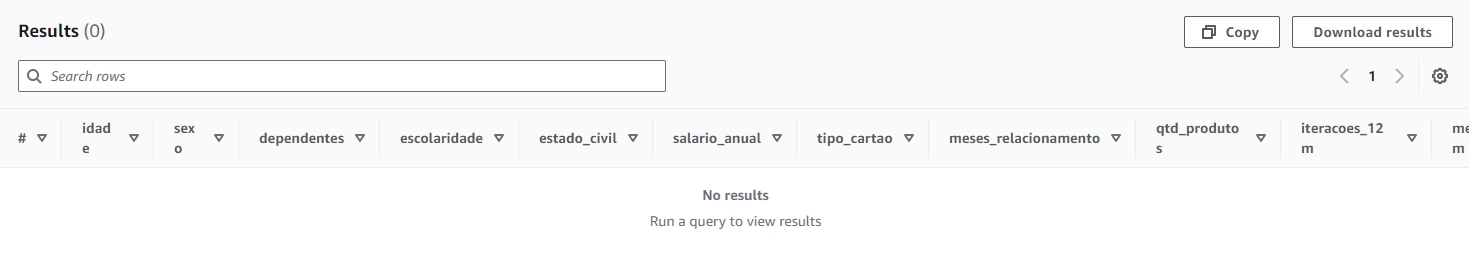

In [ ]:
imagem = cv2.imread('imagem.png8')
cv2_imshow(imagem)

Agora temos 0 linhas com valores nulos, como você pode ver acima.

Agora vamos ver as opções de dados categóricos que temos

In [ ]:
!wget -O 'imagem.png9' 'https://camo.githubusercontent.com/5fc443d5265786da6410c6ece74a24a8281b58dd2f9c3cfbb2f262be1c483775/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f31302e706e673f7261773d74727565'

--2024-04-03 23:17:12--  https://camo.githubusercontent.com/5fc443d5265786da6410c6ece74a24a8281b58dd2f9c3cfbb2f262be1c483775/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f31302e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10396 (10K) [image/png]
Saving to: ‘imagem.png9’

imagem.png9         100%[===================>]  10.15K  --.-KB/s    in 0s      

2024-04-03 23:17:13 (58.0 MB/s) - ‘imagem.png9’ saved [10396/10396]



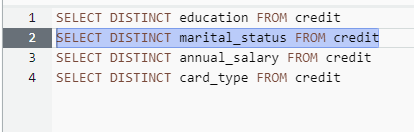

In [ ]:
imagem = cv2.imread('imagem.png9')
cv2_imshow(imagem)

Selecionando apenas uma linha por vez, podemos realizar as consultas separadamente

In [ ]:
!wget -O 'imagem.png10' 'https://camo.githubusercontent.com/39e0706778fe8b8013930e28d4fdb009917807f574dee45844ad2bc413fe4abe/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f31312e706e673f7261773d74727565'

--2024-04-03 23:24:14--  https://camo.githubusercontent.com/39e0706778fe8b8013930e28d4fdb009917807f574dee45844ad2bc413fe4abe/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f31312e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10859 (11K) [image/png]
Saving to: ‘imagem.png10’

imagem.png10        100%[===================>]  10.60K  --.-KB/s    in 0s      

2024-04-03 23:24:14 (87.1 MB/s) - ‘imagem.png10’ saved [10859/10859]



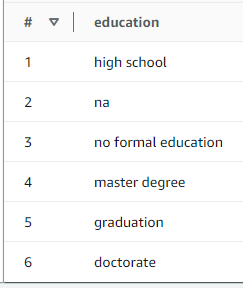

In [ ]:
imagem = cv2.imread('imagem.png10')
cv2_imshow(imagem)

In [ ]:
!wget -O 'imagem.png11' 'https://camo.githubusercontent.com/448cebee3c19d2e7437f9ab1031532ef17f10c2559f0b85245aa7cb39cf897ab/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f31332e706e673f7261773d74727565'

--2024-04-03 23:27:11--  https://camo.githubusercontent.com/448cebee3c19d2e7437f9ab1031532ef17f10c2559f0b85245aa7cb39cf897ab/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f31332e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11392 (11K) [image/png]
Saving to: ‘imagem.png11’

imagem.png11        100%[===================>]  11.12K  --.-KB/s    in 0s      

2024-04-03 23:27:12 (79.8 MB/s) - ‘imagem.png11’ saved [11392/11392]



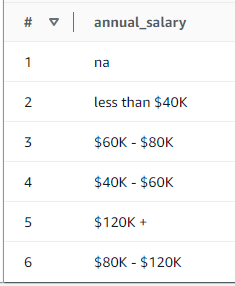

In [ ]:
imagem = cv2.imread('imagem.png11')
cv2_imshow(imagem)

In [ ]:
!wget -O 'imagem.png12' 'https://camo.githubusercontent.com/a350ca40c87d1cb137316ac71dad3b4a358dced412d24043eac9945d57ca950d/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f31342e706e673f7261773d74727565'

--2024-04-03 23:28:40--  https://camo.githubusercontent.com/a350ca40c87d1cb137316ac71dad3b4a358dced412d24043eac9945d57ca950d/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f31342e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5964 (5.8K) [image/png]
Saving to: ‘imagem.png12’

imagem.png12        100%[===================>]   5.82K  --.-KB/s    in 0s      

2024-04-03 23:28:40 (63.0 MB/s) - ‘imagem.png12’ saved [5964/5964]



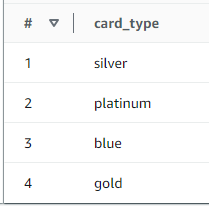

In [ ]:
imagem = cv2.imread('imagem.png12')
cv2_imshow(imagem)

Mesmo que a tabela não tenha nenhum valor NULL, nas três primeiras colunas há o valor NA (Não Aplicável) que não contribui em nada para nossa análise


Quantos valores 'na' (não aplicável) temos?

In [ ]:
!wget -O 'imagem.png13' 'https://camo.githubusercontent.com/2381b0f6d2cd2cb70bccec9eb6d940821183cc20ab4d6bb9aeb909ee4aa96b07/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f31352e706e673f7261773d74727565'

--2024-04-03 23:31:06--  https://camo.githubusercontent.com/2381b0f6d2cd2cb70bccec9eb6d940821183cc20ab4d6bb9aeb909ee4aa96b07/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f31352e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38425 (38K) [image/png]
Saving to: ‘imagem.png13’

imagem.png13        100%[===================>]  37.52K  --.-KB/s    in 0.003s  

2024-04-03 23:31:07 (10.5 MB/s) - ‘imagem.png13’ saved [38425/38425]



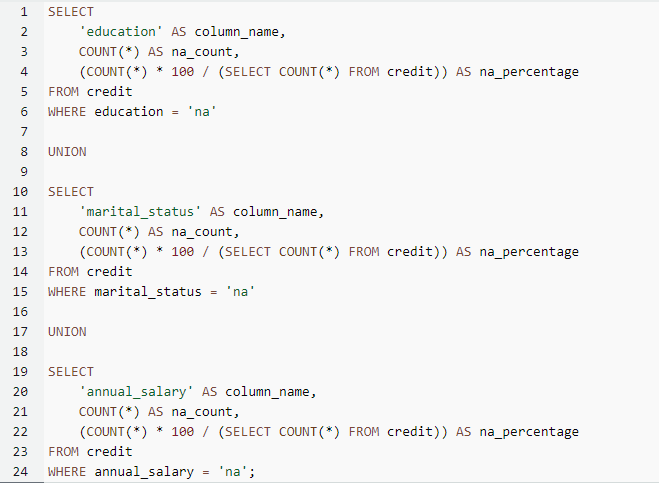

In [ ]:
imagem = cv2.imread('imagem.png13')
cv2_imshow(imagem)

In [ ]:
!wget -O 'imagem.png14' 'https://camo.githubusercontent.com/0e8763bdb589cd03e54d841394958fd01ba1eea0bc03420763125e69101831f2/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f31362e706e673f7261773d74727565'

--2024-04-03 23:32:38--  https://camo.githubusercontent.com/0e8763bdb589cd03e54d841394958fd01ba1eea0bc03420763125e69101831f2/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f31362e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10833 (11K) [image/png]
Saving to: ‘imagem.png14’

imagem.png14        100%[===================>]  10.58K  --.-KB/s    in 0s      

2024-04-03 23:32:38 (63.5 MB/s) - ‘imagem.png14’ saved [10833/10833]



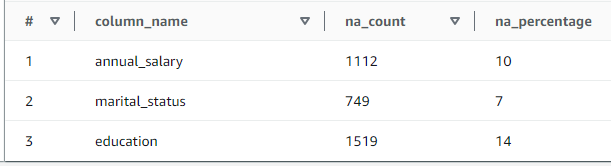

In [ ]:
imagem = cv2.imread('imagem.png14')
cv2_imshow(imagem)

Na terceira coluna, como você pode ver, a tabela tem de 7 a 15 por cento de valores 'na' (não aplicável), podemos tratar disso mais tarde se nossa análise depender de um desses dados categóricos.

Análise

O que segue a seguir é a análise desses dados em busca de padrões que nos ajudem a obter insights. Começarei por procurar a relação entre os clientes e a sua relação com o banco.

Qual a relação entre o tempo de cliente e o tipo de cartão?


Antes de começar a tratar da tabela, criei uma view para nos ajudar a determinar a categoria de relacionamento dos clientes com o banco. Esta visualização terá duas colunas: meses_de_relacionamento (bigint) e relação_cliente (varchar). Este último com três categorias de clientes: Novos, Regressados ​​e Antigos.

In [ ]:
!wget -O 'imagem.png15' 'https://camo.githubusercontent.com/837305afeea7193451442cc80eaa9c6d1a141575612365c64ed7bc528e1a1e07/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f31372e706e673f7261773d74727565'

--2024-04-03 23:36:01--  https://camo.githubusercontent.com/837305afeea7193451442cc80eaa9c6d1a141575612365c64ed7bc528e1a1e07/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f31372e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16678 (16K) [image/png]
Saving to: ‘imagem.png15’

imagem.png15        100%[===================>]  16.29K  --.-KB/s    in 0s      

2024-04-03 23:36:01 (40.0 MB/s) - ‘imagem.png15’ saved [16678/16678]



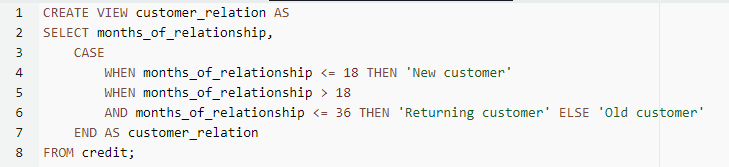

In [ ]:
imagem = cv2.imread('imagem.png15')
cv2_imshow(imagem)

In [ ]:
!wget -O 'imagem.png16' 'https://camo.githubusercontent.com/f850ca34feab576260412c6125c92de3dedaba6ef36da9213349eadff962e041/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f31382e706e673f7261773d74727565'

--2024-04-03 23:37:28--  https://camo.githubusercontent.com/f850ca34feab576260412c6125c92de3dedaba6ef36da9213349eadff962e041/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f31382e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22806 (22K) [image/png]
Saving to: ‘imagem.png16’

imagem.png16        100%[===================>]  22.27K  --.-KB/s    in 0.002s  

2024-04-03 23:37:28 (12.6 MB/s) - ‘imagem.png16’ saved [22806/22806]



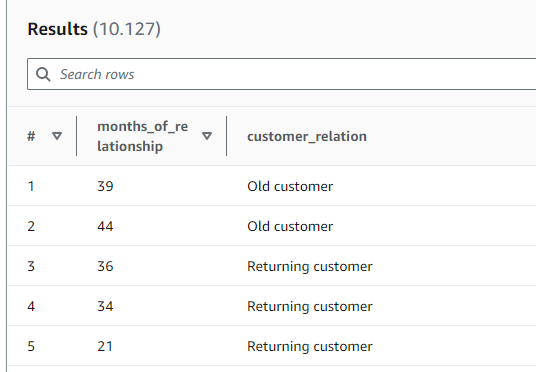

In [ ]:
imagem = cv2.imread('imagem.png16')
cv2_imshow(imagem)

Esta visualização ajudará na consulta abaixo. Nesta consulta, vemos o número percentual de usuários de um tipo de cartão por categoria de relacionamento.

In [ ]:
!wget -O 'imagem.png17' 'https://camo.githubusercontent.com/7e7f7e10b535316d89d305ac5c9d554a662c1831c4ed1d02655fc3b49bc65e62/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f31392e706e673f7261773d74727565'

--2024-04-03 23:40:09--  https://camo.githubusercontent.com/7e7f7e10b535316d89d305ac5c9d554a662c1831c4ed1d02655fc3b49bc65e62/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f31392e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42261 (41K) [image/png]
Saving to: ‘imagem.png17’

imagem.png17        100%[===================>]  41.27K  --.-KB/s    in 0.01s   

2024-04-03 23:40:09 (3.83 MB/s) - ‘imagem.png17’ saved [42261/42261]



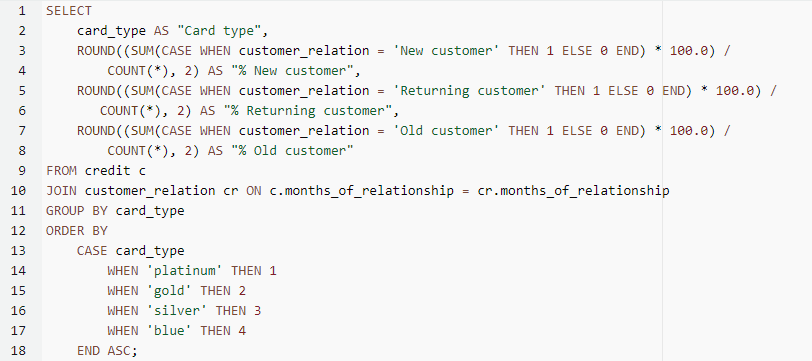

In [ ]:
imagem = cv2.imread('imagem.png17')
cv2_imshow(imagem)

In [ ]:
!wget -O 'imagem.png18' 'https://camo.githubusercontent.com/e5db05309b79f46fa57f048fd2c8efdf89586d5c672ccf91eb09525512cec18e/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f32302e706e673f7261773d74727565'm.png18

--2024-04-03 23:41:38--  https://camo.githubusercontent.com/e5db05309b79f46fa57f048fd2c8efdf89586d5c672ccf91eb09525512cec18e/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f32302e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18465 (18K) [image/png]
Saving to: ‘imagem.png18’

imagem.png18        100%[===================>]  18.03K  --.-KB/s    in 0.001s  

2024-04-03 23:41:39 (25.9 MB/s) - ‘imagem.png18’ saved [18465/18465]



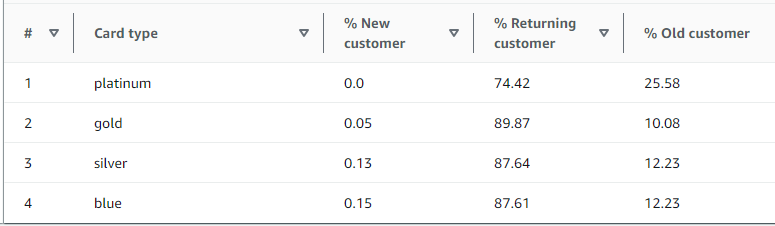

In [ ]:
imagem = cv2.imread('imagem.png18')
cv2_imshow(imagem)

Com estes dados podemos concluir que:


Novos clientes (menos de 1 ano e meio de relacionamento) não possuem cartão de crédito.
A tabela tem a maioria dos clientes como clientes recorrentes (entre 1,5 anos e 3 anos de relacionamento).
A maioria dos clientes antigos possui cartões Platinum.
Como o salário anual está relacionado a alguns indicadores:

In [ ]:
!wget -O 'imagem.png19' 'https://camo.githubusercontent.com/d44ec80f46f20ba6018c6dd4028c428e579bd51bf2dc5856057a45b227e9dd24/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f32312e706e673f7261773d74727565'

--2024-04-03 23:46:57--  https://camo.githubusercontent.com/d44ec80f46f20ba6018c6dd4028c428e579bd51bf2dc5856057a45b227e9dd24/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f32312e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34690 (34K) [image/png]
Saving to: ‘imagem.png19’

imagem.png19        100%[===================>]  33.88K  --.-KB/s    in 0.003s  

2024-04-03 23:46:57 (11.5 MB/s) - ‘imagem.png19’ saved [34690/34690]



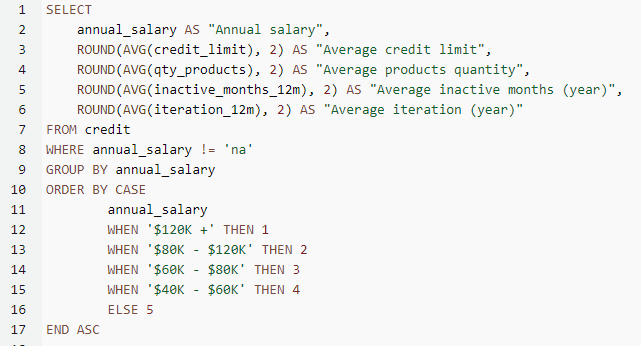

In [ ]:
imagem = cv2.imread('imagem.png19')
cv2_imshow(imagem)

In [ ]:
!wget -O 'imagem.png20' 'https://camo.githubusercontent.com/851ca20c4280bab84723c6855390b02e4c3c8fae15cc696ad07f8612ee98623f/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f32322e706e673f7261773d74727565'

--2024-04-03 23:49:33--  https://camo.githubusercontent.com/851ca20c4280bab84723c6855390b02e4c3c8fae15cc696ad07f8612ee98623f/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f32322e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32616 (32K) [image/png]
Saving to: ‘imagem.png20’

imagem.png20        100%[===================>]  31.85K  --.-KB/s    in 0.003s  

2024-04-03 23:49:33 (11.7 MB/s) - ‘imagem.png20’ saved [32616/32616]



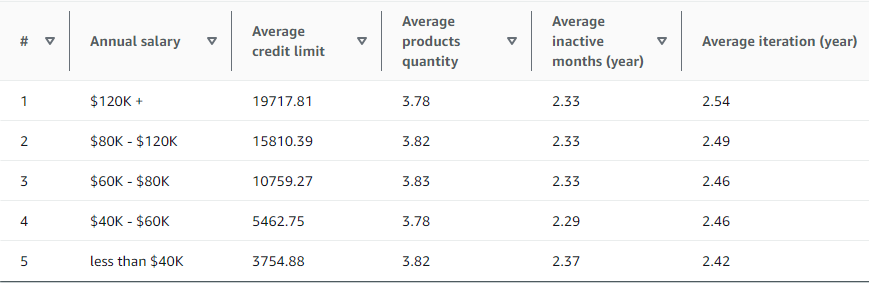

In [ ]:
imagem = cv2.imread('imagem.png20')
cv2_imshow(imagem)

Conforme mostrado, a única relação causal com o salário anual é o limite de crédito, a média dos produtos consumidos, os meses inativos e as iterações são praticamente iguais para todas as faixas salariais.


Vamos ver a porcentagem de tipos de clientes

In [ ]:
!wget -O 'imagem.png21' 'https://camo.githubusercontent.com/8b1aaaf91d633bacf9f9caca16129f2ccf212f0f65a38be15bb9d8cb9d566b40/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f32332e706e673f7261773d74727565'

--2024-04-03 23:51:42--  https://camo.githubusercontent.com/8b1aaaf91d633bacf9f9caca16129f2ccf212f0f65a38be15bb9d8cb9d566b40/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f32332e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26445 (26K) [image/png]
Saving to: ‘imagem.png21’

imagem.png21        100%[===================>]  25.83K  --.-KB/s    in 0.002s  

2024-04-03 23:51:42 (16.4 MB/s) - ‘imagem.png21’ saved [26445/26445]



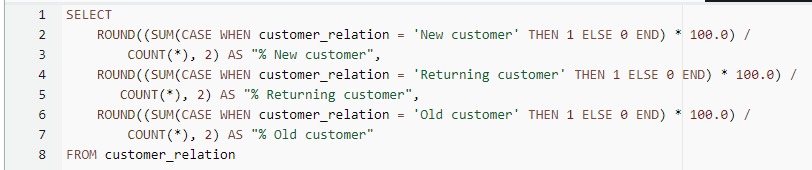

In [ ]:
imagem = cv2.imread('imagem.png21')
cv2_imshow(imagem)

In [ ]:
!wget -O 'imagem.png22' 'https://camo.githubusercontent.com/99027fb528e453a4ccff9e541cb2b0efac463ee4132bc17a8fbcd10eac9b0597/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f32342e706e673f7261773d74727565'

--2024-04-03 23:53:00--  https://camo.githubusercontent.com/99027fb528e453a4ccff9e541cb2b0efac463ee4132bc17a8fbcd10eac9b0597/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f32342e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7875 (7.7K) [image/png]
Saving to: ‘imagem.png22’

imagem.png22        100%[===================>]   7.69K  --.-KB/s    in 0s      

2024-04-03 23:53:01 (81.8 MB/s) - ‘imagem.png22’ saved [7875/7875]



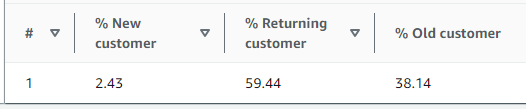

In [ ]:
imagem = cv2.imread('imagem.png22')
cv2_imshow(imagem)

Os resultados mostram que a maioria dos consumidores não é nem nova nem antiga; possuem entre um ano e meio e três anos de relacionamento, seguidos de perto por pouco mais de um terço dos consumidores constituídos por clientes antigos.


Como é a distribuição dos tipos de cartão?

In [ ]:
!wget -O 'imagem.png23' 'https://camo.githubusercontent.com/9e68b4c51b0f65d37415ffbd635096d7ad5cd27f39e9e7475a56b692bf5afcc4/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f32352e706e673f7261773d74727565'

--2024-04-03 23:55:33--  https://camo.githubusercontent.com/9e68b4c51b0f65d37415ffbd635096d7ad5cd27f39e9e7475a56b692bf5afcc4/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f32352e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10942 (11K) [image/png]
Saving to: ‘imagem.png23’

imagem.png23        100%[===================>]  10.69K  --.-KB/s    in 0s      

2024-04-03 23:55:33 (62.0 MB/s) - ‘imagem.png23’ saved [10942/10942]



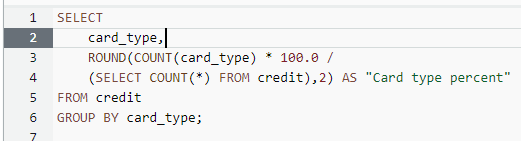

In [ ]:
imagem = cv2.imread('imagem.png23')
cv2_imshow(imagem)

In [ ]:
!wget -O 'imagem.png24' 'https://camo.githubusercontent.com/c4042b7c2f8b3e397b285b950d2846360b726c2287b141e80f7bf1d5f692197a/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f32362e706e673f7261773d74727565'

--2024-04-03 23:56:46--  https://camo.githubusercontent.com/c4042b7c2f8b3e397b285b950d2846360b726c2287b141e80f7bf1d5f692197a/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f32362e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10545 (10K) [image/png]
Saving to: ‘imagem.png24’

imagem.png24        100%[===================>]  10.30K  --.-KB/s    in 0s      

2024-04-03 23:56:46 (89.0 MB/s) - ‘imagem.png24’ saved [10545/10545]



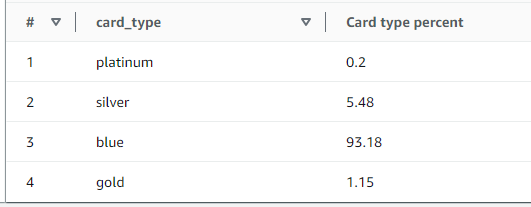

In [ ]:
imagem = cv2.imread('imagem.png24')
cv2_imshow(imagem)

Os dados revelam uma distribuição clara dos tipos de utilizadores, sendo a maioria enquadrada na categoria cartão azul, representando o tipo de cliente mais comum e padrão. Em contrapartida, os titulares de cartões Platinum, ou seja, os nossos clientes mais premium, representam apenas 0,2% do total de utilizadores. Talvez devêssemos ter mais investimentos para atrair clientes da categoria premium.


Quanto gastam e geram lucro:

In [ ]:
!wget -O 'imagem.png25' 'https://camo.githubusercontent.com/96df32d868866203da3c03b6bf16d66c19ba4ca20c96ddf5eca5dd422fee0a04/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f32372e706e673f7261773d74727565'

--2024-04-03 23:59:29--  https://camo.githubusercontent.com/96df32d868866203da3c03b6bf16d66c19ba4ca20c96ddf5eca5dd422fee0a04/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f32372e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16590 (16K) [image/png]
Saving to: ‘imagem.png25’

imagem.png25        100%[===================>]  16.20K  --.-KB/s    in 0s      

2024-04-03 23:59:29 (46.5 MB/s) - ‘imagem.png25’ saved [16590/16590]



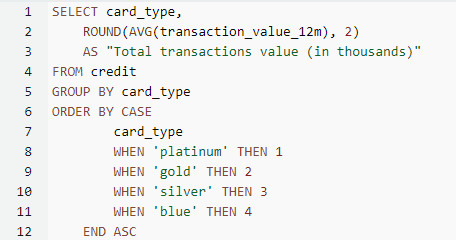

In [ ]:
imagem = cv2.imread('imagem.png25')
cv2_imshow(imagem)

In [ ]:
!wget -O 'imagem.png26' 'https://camo.githubusercontent.com/90c539a67e7bebbd29b3befba7cb77ca66bf7785a3f4eab7a9ef77f3d9d3b14f/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f32382e706e673f7261773d74727565'

--2024-04-04 00:00:46--  https://camo.githubusercontent.com/90c539a67e7bebbd29b3befba7cb77ca66bf7785a3f4eab7a9ef77f3d9d3b14f/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f32382e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13100 (13K) [image/png]
Saving to: ‘imagem.png26’

imagem.png26        100%[===================>]  12.79K  --.-KB/s    in 0s      

2024-04-04 00:00:47 (91.5 MB/s) - ‘imagem.png26’ saved [13100/13100]



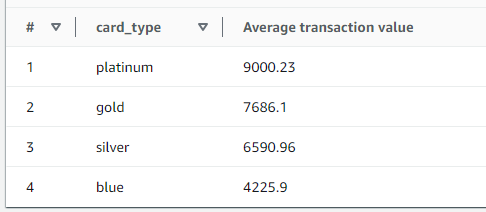

In [ ]:
imagem = cv2.imread('imagem.png26')
cv2_imshow(imagem)

Os valores médios das transações nos dizem que quanto mais premium o cartão, mais o cliente tende a gastar. Porém, como vimos anteriormente, temos uma diferença significativa entre o número de clientes de cada tipo de cartão. A próxima consulta nos ajudará a ver o valor total da transação de cada tipo de cartão.

In [ ]:
!wget -O 'imagem.png27' 'https://camo.githubusercontent.com/52ab5f9ec995336636527617cc99c95d2eacd1f5de25e1f1aecec4a75882c855/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f32392e706e673f7261773d74727565'

--2024-04-04 00:03:01--  https://camo.githubusercontent.com/52ab5f9ec995336636527617cc99c95d2eacd1f5de25e1f1aecec4a75882c855/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f32392e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17200 (17K) [image/png]
Saving to: ‘imagem.png27’

imagem.png27        100%[===================>]  16.80K  --.-KB/s    in 0.001s  

2024-04-04 00:03:02 (18.7 MB/s) - ‘imagem.png27’ saved [17200/17200]



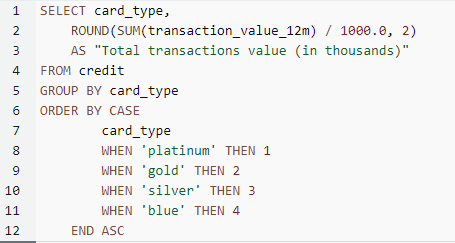

In [ ]:
imagem = cv2.imread('imagem.png27')
cv2_imshow(imagem)

In [ ]:
!wget -O 'imagem.png28' 'https://camo.githubusercontent.com/6850cbf4bb5a0f9866c1c7a7344679eec992cabb2032bba80c11e56883359989/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f33302e706e673f7261773d74727565'

--2024-04-04 00:04:16--  https://camo.githubusercontent.com/6850cbf4bb5a0f9866c1c7a7344679eec992cabb2032bba80c11e56883359989/68747470733a2f2f6769746875622e636f6d2f6361726e6569726f2d6665726e616e646f2f454241432f626c6f622f6d61696e2f6173736574732f496d616765732f4544415f437265646974436172642f33302e706e673f7261773d74727565
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13660 (13K) [image/png]
Saving to: ‘imagem.png28’

imagem.png28        100%[===================>]  13.34K  --.-KB/s    in 0.001s  

2024-04-04 00:04:17 (23.3 MB/s) - ‘imagem.png28’ saved [13660/13660]



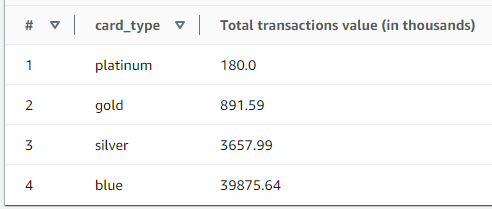

In [ ]:
imagem = cv2.imread('imagem.png28')
cv2_imshow(imagem)

Agora podemos ver uma enorme diferença entre os valores totais gastos em cada tipo de cartão, variando de 180 mil no nosso cartão mais premium (mas com poucos clientes) a mais de 3 milhões no nosso cartão inicial (com muitos clientes). Como vimos anteriormente, o segmento premium tem um limite de crédito médio de ~20.000, mas gasta apenas metade, enquanto o segmento standard tende a utilizar praticamente todo o seu limite.

Conclusão


Com base nos resultados obtidos neste projeto, os insights e as ações recomendadas são fornecidos a seguir.

Informações:


Novos clientes não possuem cartão de crédito: Novos clientes (menos de 1 ano e meio de relacionamento) não possuem cartão de crédito.

Maioria dos clientes está retornando: A mesa tem a maioria dos clientes como clientes recorrentes (entre 1,5 anos e 3 anos de relacionamento).

Os mais antigos são premium: a maioria dos clientes antigos possui cartões Platinum.

Maior salário, maior limite: Conforme mostrado, a única relação causal com o salário anual é o limite de crédito, a média dos produtos consumidos, os meses inativos e as iterações são praticamente iguais para todas as faixas salariais.

Poucos novos clientes: Os resultados mostram que a maioria dos consumidores não é nem nova nem antiga; possuem entre um ano e meio e três anos de relacionamento, seguidos de perto por pouco mais de um terço dos consumidores constituídos por clientes antigos.

Precisa de mais Premium: Os dados revelam uma distribuição clara dos tipos de usuários, com a maioria caindo na categoria cartão azul, representando o tipo de cliente mais comum e padrão. Em contrapartida, os titulares de cartões Platinum, que representam os nossos clientes mais premium, representam apenas 0,2% do total de utilizadores. Talvez devêssemos ter mais investimentos para atrair clientes da categoria premium.

Enorme diferença nas transações entre os tipos de clientes: Os valores médios das transações nos dizem que quanto mais premium o cartão, mais o cliente tende a gastar. Porém, como vimos anteriormente, temos uma diferença significativa entre o número de clientes de cada tipo de cartão, na realidade, a soma dos valores totais gastos em cada tipo de cartão apresenta uma diferença enorme que varia de 180 mil no nosso mais cartão premium (com poucos clientes) para mais de 3 milhões em nosso cartão inicial (com muitos clientes).

Baixa utilização de crédito no Premium: O segmento premium tem limite de crédito médio de 19 mil, mas gasta apenas metade, enquanto o segmento standard tende a utilizar praticamente todo o seu limite.

Chamada para Ação


Envolvimento de novos clientes: comece incentivando novos clientes a usarem cartões de crédito, uma vez que atualmente não os possuem. Crie campanhas de marketing focadas e ofereça incentivos para promover a adoção do cartão neste grupo.


Fidelização do cliente: concentre-se em reter seus clientes recorrentes e antigos, pois eles constituem uma parte significativa de sua base de clientes. Personalize serviços e estratégias de engajamento para aumentar sua fidelidade.


Atrair clientes Premium: Dado que a maioria dos clientes possui cartões azuis, explore o potencial para atrair mais clientes premium. Invista em marketing e serviços adaptados a este grupo para aumentar o número de portadores de cartões Platinum e Gold.


Aumente os gastos premium: Os titulares de cartões premium tendem a não usar muito limite. Desenvolva planos e promoções destinadas a incentivar maiores gastos entre seu segmento de clientes premium.


Em resumo, a análise destes dados dá-nos informações úteis sobre os nossos clientes e apresenta oportunidades de crescimento e otimização. Podemos usar essas informações para fazer escolhas inteligentes que fidelizem os clientes, aumentem a receita e melhorem o desempenho dos negócios. Se continuarmos analisando os dados e talvez conseguirmos mais deles, poderemos aprender ainda mais. Uma maneira de fazer isso poderia ser criando um painel de dados, o que seria um ótimo próximo passo para expandir este projeto. Obrigado por ler meu projeto até aqui!